In [154]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [108]:
df =  sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<AxesSubplot:>

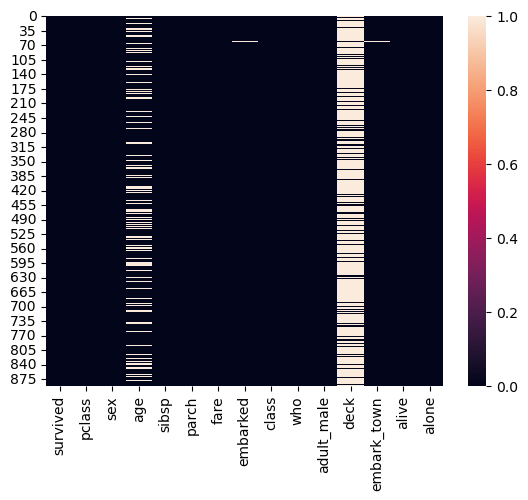

In [109]:
sns.heatmap(df.isnull())#,yticklabels=False)

In [110]:
df.drop('deck',axis =1,inplace=True)

In [111]:
df['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [112]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('survived',axis =1),df.survived)

In [113]:
x_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
734,2,male,23.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
634,3,female,9.0,3,2,27.9000,S,Third,child,False,Southampton,no,False
446,2,female,13.0,0,1,19.5000,S,Second,child,False,Southampton,yes,False
316,2,female,24.0,1,0,26.0000,S,Second,woman,False,Southampton,yes,False
189,3,male,36.0,0,0,7.8958,S,Third,man,True,Southampton,no,True


In [114]:
x_train.groupby(['pclass'])['age'].mean()

pclass
1    37.377122
2    28.572581
3    24.798598
Name: age, dtype: float64

<AxesSubplot:xlabel='class', ylabel='age'>

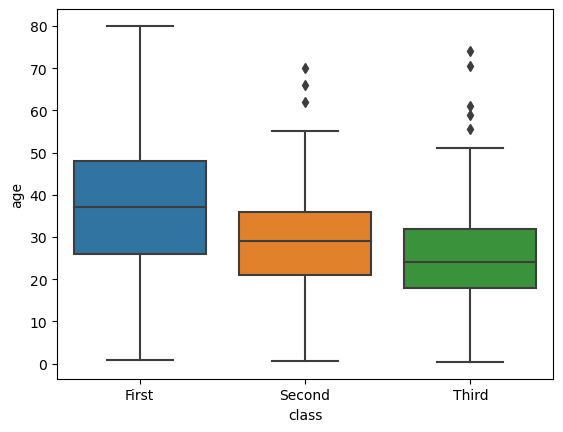

In [115]:
sns.boxplot(data=x_train,x='class',y='age')

In [116]:
# First     38.528777
# Second    30.202290
# Third     25.483722

def age_method(cols):
#     print(col1,col2)
    pclass = cols[0]
    age = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 30
        elif pclass == 3:
            return 25
    else:
        return age
        


In [123]:
x_train['age'] = x_train[['pclass','age']].apply(age_method,axis =1)

In [124]:
x_train['age'].isnull()

734    False
634    False
446    False
316    False
189    False
       ...  
95     False
43     False
198    False
256    False
871    False
Name: age, Length: 668, dtype: bool

<AxesSubplot:>

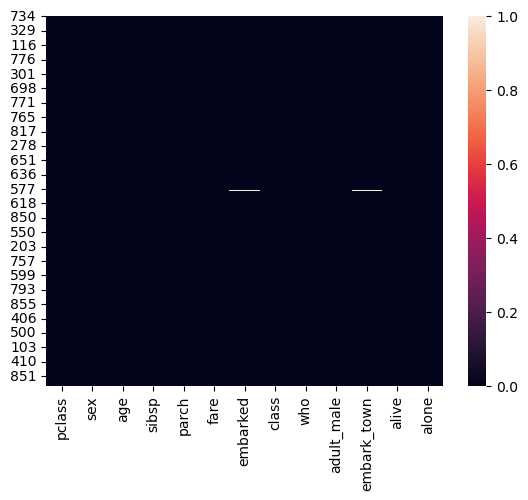

In [125]:
sns.heatmap(x_train.isnull())#,yticklabels=False)

In [126]:
x_train.dropna(inplace=True)

In [127]:
x_train.count()

pclass         666
sex            666
age            666
sibsp          666
parch          666
fare           666
embarked       666
class          666
who            666
adult_male     666
embark_town    666
alive          666
alone          666
dtype: int64

In [128]:
x_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
734,2,male,23.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
634,3,female,9.0,3,2,27.9000,S,Third,child,False,Southampton,no,False
446,2,female,13.0,0,1,19.5000,S,Second,child,False,Southampton,yes,False
316,2,female,24.0,1,0,26.0000,S,Second,woman,False,Southampton,yes,False
189,3,male,36.0,0,0,7.8958,S,Third,man,True,Southampton,no,True


In [136]:
ct = ColumnTransformer(transformers=[('enc',OneHotEncoder(),['sex'])],remainder='passthrough')

In [137]:
x_train2 = ct.fit_transform(x_train)

In [140]:
x_train2[0]

array([0.0, 1.0, 2, 23.0, 0, 0, 13.0, 'S', 'Second', 'man', True,
       'Southampton', 'no', True], dtype=object)

In [143]:
sex=pd.get_dummies(x_train['sex'])
embarked = pd.get_dummies(x_train['embarked'])
clas = pd.get_dummies(x_train['class'])


In [146]:
train = pd.concat([x_train,sex,embarked,clas],axis =1)
train.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,...,alive,alone,female,male,C,Q,S,First,Second,Third
734,2,male,23.0,0,0,13.0000,S,Second,man,True,...,no,True,0,1,0,0,1,0,1,0
634,3,female,9.0,3,2,27.9000,S,Third,child,False,...,no,False,1,0,0,0,1,0,0,1
446,2,female,13.0,0,1,19.5000,S,Second,child,False,...,yes,False,1,0,0,0,1,0,1,0
316,2,female,24.0,1,0,26.0000,S,Second,woman,False,...,yes,False,1,0,0,0,1,0,1,0
189,3,male,36.0,0,0,7.8958,S,Third,man,True,...,no,True,0,1,0,0,1,0,0,1


In [151]:
# train.drop('sex',axis = 1,inplace=True)
train.drop('embarked',axis = 1,inplace=True)
train.drop('class',axis = 1,inplace=True)
train.head()

,pclass,age,sibsp,parch,fare,who,adult_male,embark_town,alive,alone,female,male,C,Q,S,First,Second,Third
734,2,23.0,0,0,13.0000,man,True,Southampton,no,True,0,1,0,0,1,0,1,0
634,3,9.0,3,2,27.9000,child,False,Southampton,no,False,1,0,0,0,1,0,0,1
446,2,13.0,0,1,19.5000,child,False,Southampton,yes,False,1,0,0,0,1,0,1,0
316,2,24.0,1,0,26.0000,woman,False,Southampton,yes,False,1,0,0,0,1,0,1,0
189,3,36.0,0,0,7.8958,man,True,Southampton,no,True,0,1,0,0,1,0,0,1


In [152]:
train.drop(['who','adult_male','embark_town','alive','alone'],axis =1 , inplace=True)

In [153]:
train.head()

,pclass,age,sibsp,parch,fare,female,male,C,Q,S,First,Second,Third
734,2,23.0,0,0,13.0000,0,1,0,0,1,0,1,0
634,3,9.0,3,2,27.9000,1,0,0,0,1,0,0,1
446,2,13.0,0,1,19.5000,1,0,0,0,1,0,1,0
316,2,24.0,1,0,26.0000,1,0,0,0,1,0,1,0
189,3,36.0,0,0,7.8958,0,1,0,0,1,0,0,1


In [155]:
log = LogisticRegression()

In [156]:
log.fit(train,y_train)

ValueError: Found input variables with inconsistent numbers of samples: [666, 668]